# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

# Data Description
The Haberman’s survival data set contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

# Attribute Information:

1. Age of patient at time of operation (numerical)

2. Patient’s year of operation (1900, numerical)

3. Number of positive auxillary nodes detected (numerical)

Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years


# OBJECTIVE

Here the objective is to predict whether the patient will survive after 5 years or not based upon the patient’s age, year of treatment and the number of positive lymph nodes.



In [1]:
#TO READ THE CSV FILE OF HABERMAN
#importing the pakages
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the data as required
sns.set()
haberman= pd.read_csv('haberman.csv', names=['age', 'year_OP', '(+)_lymph_nodes', 'survival_status_within_5_years'])
print(haberman.head())




   age  year_OP  (+)_lymph_nodes  survival_status_within_5_years
0   30       64                1                               1
1   30       62                3                               1
2   30       65                0                               1
3   31       59                2                               1
4   31       65                4                               1


In [2]:
print(haberman.info())
# no null value,so no imputation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                               306 non-null int64
year_OP                           306 non-null int64
(+)_lymph_nodes                   306 non-null int64
survival_status_within_5_years    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


In [3]:
print("                       MODIFIED DATA")
print("")
haberman['survival_status_within_5_years'] = haberman['survival_status_within_5_years'].replace(1,"yes")
haberman['survival_status_within_5_years'] = haberman['survival_status_within_5_years'].replace(2,"no")

haberman['survival_status_within_5_years'] = haberman['survival_status_within_5_years'].astype('category')
print(haberman.head())


                       MODIFIED DATA

   age  year_OP  (+)_lymph_nodes survival_status_within_5_years
0   30       64                1                            yes
1   30       62                3                            yes
2   30       65                0                            yes
3   31       59                2                            yes
4   31       65                4                            yes


#CHANGING FOR BETTER UNDERSTANDING
#changing 1 to yes   i.e.  1 denotes  people who survied after 5 year  ---> YES 
#changing 2 to no    i.e.  2 denotes people who didnot survive after 5 year ---> NO

In [4]:
# (Q) how many data-points and features?
print (haberman.shape)
# rows=306
#columns= 4

(306, 4)


# HIGHLEVEL STATISTICS TO SUMMARIES THE STATISTICS

In [5]:
#(Q) What are the column names in our dataset?
print (haberman.columns)

Index(['age', 'year_OP', '(+)_lymph_nodes', 'survival_status_within_5_years'], dtype='object')


In [6]:

print("survival_status")
haberman['survival_status_within_5_years'].value_counts()

#Haberman is a imbalanced dataset as the number of data points 
#1. people survived  5 years or more is 1 that is 224
#2. people died within 5 years is 2 that is 81

survival_status


yes    225
no      81
Name: survival_status_within_5_years, dtype: int64

In [7]:
haberman['survival_status_within_5_years'].value_counts(normalize=True)

# 'yes' being 0.73 and 'no' being 0.26..THIS IS IMBALANCED DATASET


yes    0.735294
no     0.264706
Name: survival_status_within_5_years, dtype: float64

In [8]:
print(haberman.describe())

              age     year_OP  (+)_lymph_nodes
count  306.000000  306.000000       306.000000
mean    52.457516   62.852941         4.026144
std     10.803452    3.249405         7.189654
min     30.000000   58.000000         0.000000
25%     44.000000   60.000000         0.000000
50%     52.000000   63.000000         1.000000
75%     60.750000   65.750000         4.000000
max     83.000000   69.000000        52.000000


1)  We see that the max age of the patient is 83 and min is 30 and the mean of 306 patient is 52

2) maximun lymph node is 52. but 75% is less than 5 and 25% has no positve lymph

# UNIVARIANT GRAPHS

These are mainly used to describe single attribute 

# PDF

1) PDF are distribution graphs known as probability density graph that tells how the data points are distributed  w.r.t the frequency or  the density of a particular feature  in the graph like age, survival status,(+)lyump nodes

2) Here the height of the bar denotes the percentage of data points under the corresponding group.


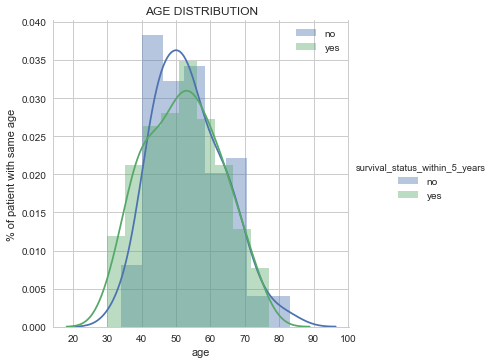

In [33]:
warnings.filterwarnings("ignore")
sns.FacetGrid(haberman, hue="survival_status_within_5_years", size=5)\
   .map(sns.distplot, "age") \
   .add_legend();
plt.ylabel("% of patient with same age")
plt.title("AGE DISTRIBUTION")
plt.show();


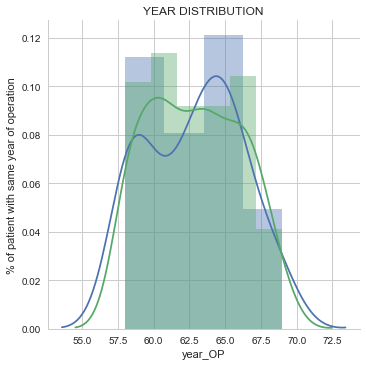

In [35]:
sns.FacetGrid(haberman, hue="survival_status_within_5_years", size=5) \
   .map(sns.distplot, "year_OP") \
   .add_legend
plt.ylabel("% of patient with same year of operation")
plt.title("YEAR DISTRIBUTION")
plt.show();


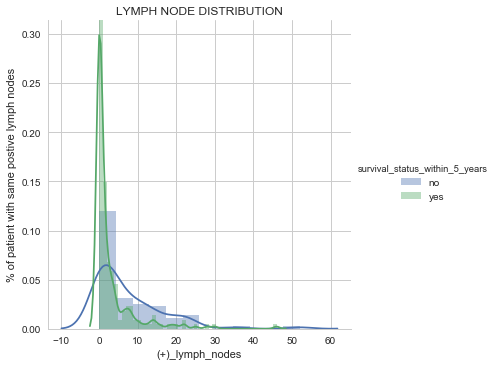

In [36]:
sns.FacetGrid(haberman, hue="survival_status_within_5_years", size=5) \
   .map(sns.distplot, "(+)_lymph_nodes") \
   .add_legend();
plt.ylabel("% of patient with same postive lymph nodes")
plt.title("LYMPH NODE DISTRIBUTION")
plt.show();


# CDF(Cummulative density graph)

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


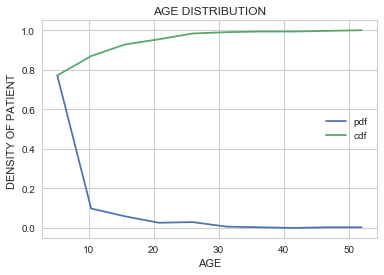

In [42]:
counts, bin_edges = np.histogram(haberman['(+)_lymph_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf');
plt.plot(bin_edges[1:], cdf,label='cdf')
plt.xlabel("(+)_LYMPH_NODES")
plt.ylabel(" DENSITY OF PATIENT  ")
plt.title(" (+)_LYMPH_NODE DISTRIBUTION")
plt.legend()
plt.show();


[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


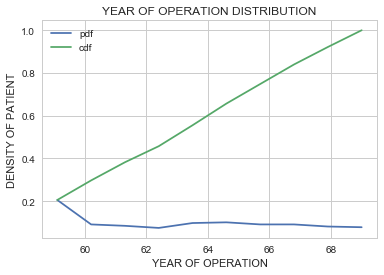

In [43]:
counts, bin_edges = np.histogram(haberman['year_OP'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf');
plt.plot(bin_edges[1:], cdf,label='cdf')
plt.xlabel("YEAR OF OPERATION")
plt.ylabel(" DENSITY OF PATIENT ")
plt.title("YEAR OF OPERATION DISTRIBUTION")
plt.legend()
plt.show();


[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


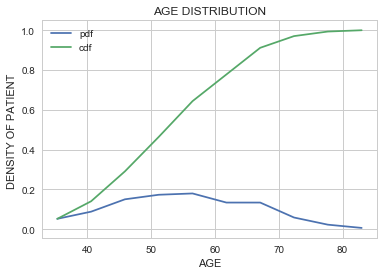

In [44]:
counts, bin_edges = np.histogram(haberman['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf');
plt.plot(bin_edges[1:], cdf,label='cdf')
plt.xlabel("AGE")
plt.ylabel("DENSITY OF PATIENT ")
plt.title("AGE DISTRIBUTION")
plt.legend()
plt.show();


# BOXPLOT

Box plot takes a less space and visually represents the five number summary of the data points in a box. 
The outliers are displayed as points outside the box.

Inter Quartile Range = Q3 -Q1

1. Q1–1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR




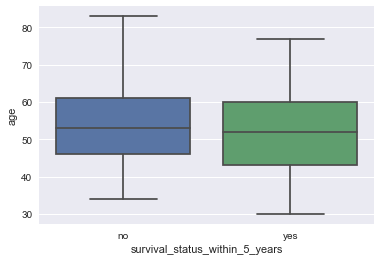

In [20]:
sns.boxplot(x='survival_status_within_5_years',y='age', data=haberman)
plt.show()

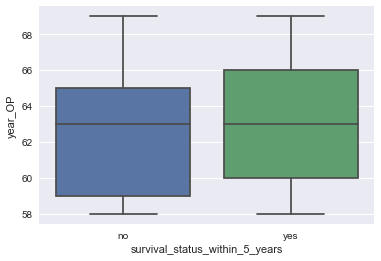

In [21]:
sns.boxplot(x='survival_status_within_5_years',y='year_OP', data=haberman)
plt.show()

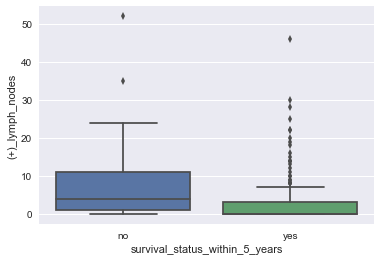

In [22]:
sns.boxplot(x='survival_status_within_5_years',y='(+)_lymph_nodes', data=haberman)
plt.show()

# VIOLIN PLOT

1) Violin plot is the combination of box plot and
probability density function and simplifies.

2) Denser regions of the data are fatter, and sparser ones thinner in a violin plot




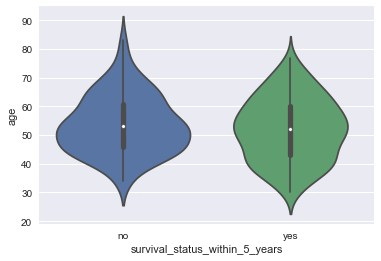

In [23]:
sns.violinplot(x="survival_status_within_5_years", y="age", data=haberman, size=5)

plt.show()

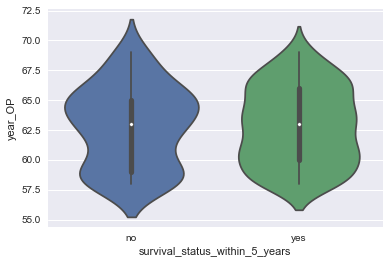

In [24]:
sns.violinplot(x="survival_status_within_5_years", y="year_OP", data=haberman, size=8)
plt.show()

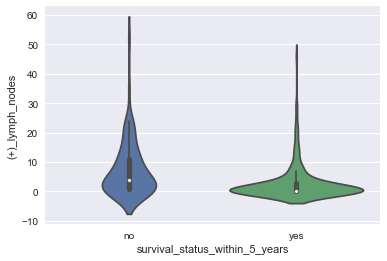

In [25]:
sns.violinplot(x="survival_status_within_5_years", y="(+)_lymph_nodes", data=haberman, size=8)
plt.show()

# 2D SCATTERPLOT

Bivariate Analysis

The analysis of the relationship between multiple variables and its effect on the target class is known as multi variate analysis.

Pair plot is commonly used to visualize the relationship between Quantitative and Quantitative columns. As all the independent columns in our data set are quantitative, use the pair plot.

Pair plot in seaborn plots the scatter plot between every two data columns in a given data frame. It is used to visualize the relationship between two variables

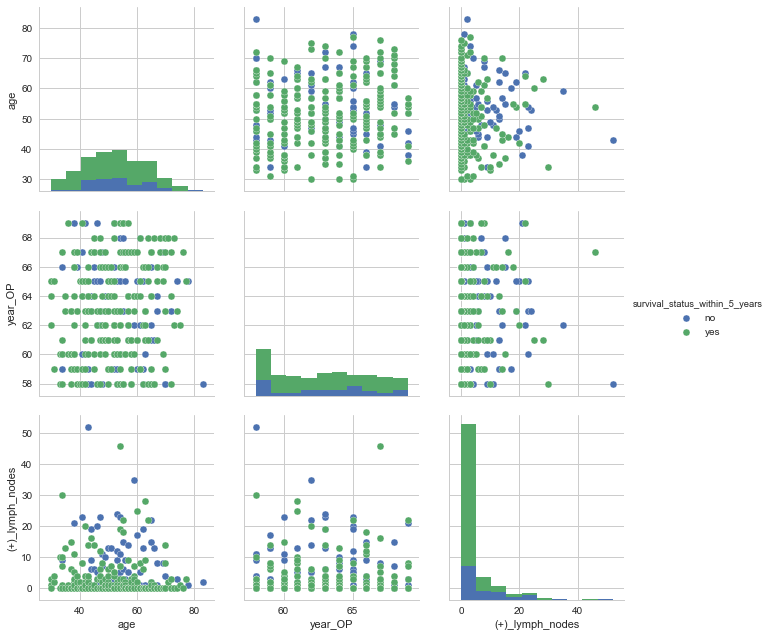

In [26]:
# pairwise scatter plot: Pair-Plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="survival_status_within_5_years", size=3);
plt.show()
#the diagonol elements are PDFs for each feature

By scattering the data points between year_OP and (+)_lymph_nodes, we can see the better seperation between the two classes than other scatter plots.



# OBSERVATION



1) The number of positive lymph nodes of the survivors is highly dense from 0 to 5 

2) Almost 80% of the patients have less than or equal to 5 positive lymph nodes.

3) The patients treated at the age 45 to 55 have slightly lower chance to survive than the rest.

4) The patients treated between 1959 and 1962 have the good chance to survive than the rest.

5) The patients treated between 1963 and 1966 have the lower chance to survive than the rest. 

6) The patients treated after 1966 have the better chance to survive than the rest.





# Conclusion:


From the above EDA of haberman Cancer Survival dataset we can say that:

1. Number of positive axiliary nodes is the most important feature when it comes to predicting the survival chance of a patient.

2. The more number of axiliary nodes their are, the more likely it is that the patient will die, with age also being a factor where if age is above 40 the patient is more likely to die if he/she has 5 or more axiliary node 

3. On the other hand, if number of nodes are more than 10 axiliary nodes were more likely to die irrespective of their age. 

4. 90% of the patients in the dataset had less than 13 nodes in their body where as 75% had less than 4 and 50% of the patients had 0 or 1 axiliary nodes.

5. 90% of the patients were under 67, with minimum age being 30 and maximum age 83.17